In [1]:
data_path = '../data/Philippe2009/UPDUNN_MB.nex'

In [2]:
from reprophylo import *
def parse_philippe_mrbayes_partitions(mrbayes_nexus):
    with open(mrbayes_nexus) as partfile:
        lines = partfile.readlines()
        parts = {}
        gene_names = []
        ranges = []
        for line in lines:
            if '[genes' in line:
                gene_names = line.rstrip().split(':')[1].replace(']','').split(',')
            if 'partition part = ' in line:
                ranges = line.rstrip().split(':')[1].replace(';','').split(',')
                ranges = [i.split('-') for i in ranges]
        for j in range(len(gene_names)):
            parts[gene_names[j]] = [int(ranges[j][0])-1,
                                    int(ranges[j][1])]
        return parts
    

def pj_from_nexus(phylip_filename, charsets ,output_dir, char_type,
                            feature_type, project=False, pickle=False, git=False):
    
    
    from reprophylo import Locus
    from Bio import AlignIO
    
    alignment =  AlignIO.read(phylip_filename, 'nexus')
    filenames = []
    loci_list = []
    for locus_name in charsets:
        s = charsets[locus_name][0]
        e = charsets[locus_name][1]
        outname = "%s/%s.fasta"%(output_dir,locus_name)
        AlignIO.write(alignment[:, s:e], outname, 'fasta')
        filenames.append(outname)
        loci_list.append(Locus(char_type, feature_type, locus_name, [locus_name]))
    
    if project:
        from reprophylo import Project
        pj = Project(loci_list, pickle=pickle, git=git)
        i=1
        for f in filenames:
            locus_name = f.split('/')[-1].split('.')[0]
            print '%i/%i reading %s'%(i,len(filenames), locus_name)
            i += 1
            pj.read_alignment(f, char_type, feature_type, locus_name)
        return pj
            
    else:  
        return filenames, loci_list

In [3]:
if not os.path.exists('../data/Philippe2009/fastaalns'):
    os.mkdir('../data/Philippe2009/fastaalns')
    
fasta_dir = '../data/Philippe2009/fastaalns'

In [5]:
charsets = parse_philippe_mrbayes_partitions(data_path)
pj = pj_from_nexus(data_path,
                   charsets,
                   fasta_dir,
                   'prot',
                   'PROT',
                    project=True,
                    pickle='Philippe2009',
                    git=True
                  )

/home/amir/Dropbox/python_modules/rpgit.py:74: UserWarning: Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code
  warnings.warn('Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code')
/home/amir/Dropbox/python_modules/rpgit.py:90: UserWarning: A git repository was created in /home/amir/Dropbox/basal_metazoa/Philippe2009.
  warnings.warn('A git repository was created in %s.'%repoDir)
/home/amir/Dropbox/python_modules/reprophylo.py:255: UserWarning: The new repository is called Philippe2009.
  warnings.warn('The new repository is called %s.'%open(cwd + '/.git/description', 'r').read().rstrip())
DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened


1/150 reading tribe1378
dropping seq tribe1378 in locus Saccharomyces_cerevisiae: missing data
dropping seq tribe1378 in locus Euperipatoides_kanangrensis: missing data
dropping seq tribe1378 in locus Spinochordodes_tellinii: missing data
dropping seq tribe1378 in locus Boophilus_microplus: missing data
dropping seq tribe1378 in locus Acanthoscurria_gomesiana: missing data
dropping seq tribe1378 in locus Anoplodactylus_eroticus: missing data
dropping seq tribe1378 in locus Carcinoscorpius_rotundicauda: missing data
dropping seq tribe1378 in locus Carcinus_maenas: missing data
dropping seq tribe1378 in locus Biomphalaria_glabrata: missing data
dropping seq tribe1378 in locus Mytilus_galloprovincialis: missing data
dropping seq tribe1378 in locus Argopecten_irradians: missing data
dropping seq tribe1378 in locus Euprymna_scolopes: missing data
dropping seq tribe1378 in locus Chaetopleura_apiculata: missing data
dropping seq tribe1378 in locus Chaetoderma_nitidulum: missing data
dropping 

In [6]:
print pj.records[0].format('genbank')

LOCUS       denovo0                   98 aa                     UNK 01-JAN-1980
DEFINITION  .
ACCESSION   denovo0
VERSION     denovo0
KEYWORDS    .
SOURCE      .
  ORGANISM  .
            .
FEATURES             Location/Qualifiers
     source          1..98
                     /feature_id="denovo0_source"
                     /original_id="Cryptococcus_neoformans"
                     /original_desc
     PROT            1..98
                     /feature_id="denovo0_f0"
                     /gene="tribe1378"
                     /prot_degen_prop="0.0"
ORIGIN
        1 sqisldhglt kvwvkqdgvp egthqlepli pgyifhpllv tvlvlepiak enyfipkngm
       61 nmlgllkspm vlmmlfsgim mwgmpkllsn mdpefske
//



In [7]:
# mock trimming
trimal = TrimalConf(pj, method_name='noallgaps', trimal_commands={'noallgaps': True})

trimal -in 904181433806070.5_tribe895@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe585-A@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_rps15@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_eif5a@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_rps11@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe893@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_rpl14a@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe1200@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe756@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe1132@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_rpl9@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_rla2-A@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe333@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe1015@ReadDirectly.fasta -noallgaps
trimal -in 904181433806070.5_tribe435@ReadDirectly.fasta -no

In [8]:
pj.trim([trimal])

/usr/local/lib/python2.7/dist-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))
/home/amir/Dropbox/python_modules/reprophylo.py:5991: UserWarning: Protein loci GC content will be set to 0.0
  warnings.warn('Protein loci GC content will be set to 0.0')


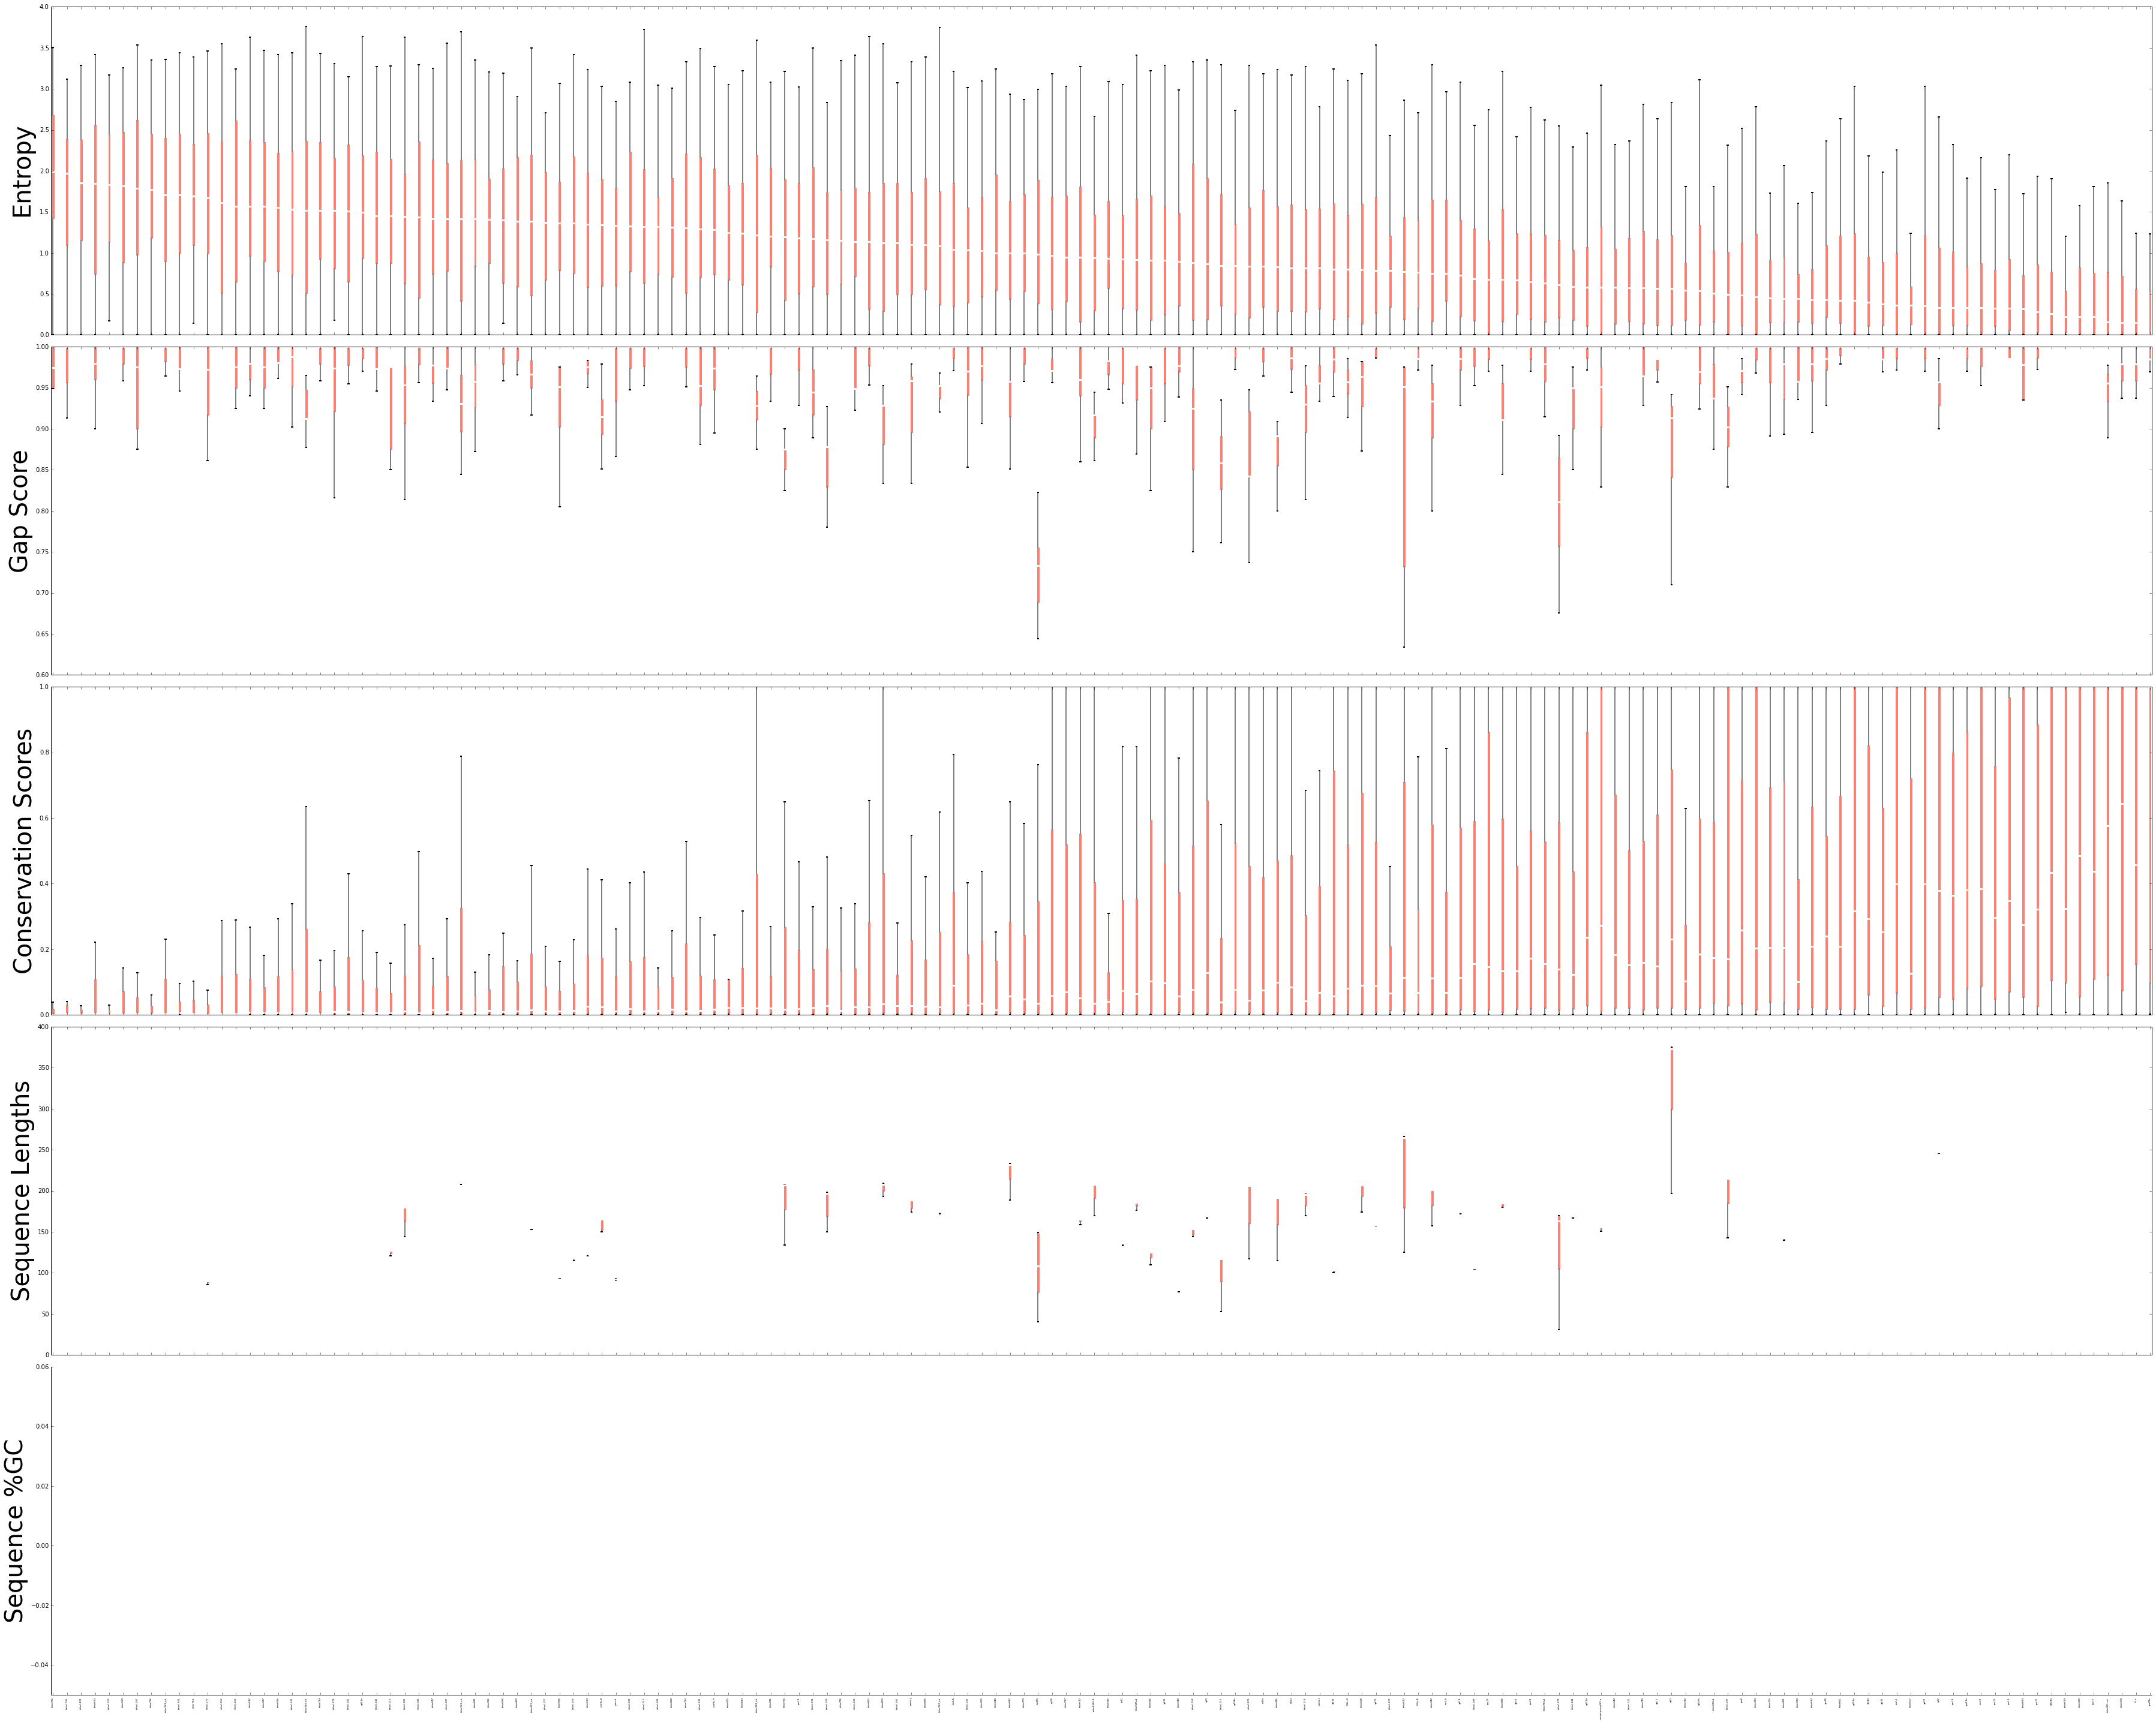

In [7]:
loci_entropy = LociStats(pj)
loci_entropy.sort()
%matplotlib inline
loci_entropy.plot('figures/sort_by_entropy.png', figsize=[50,40], ytick_fsize=8)

In [4]:
from reprophylo import *
pj = unpickle_pj('Philippe2009')
loci_gap = LociStats(pj)
loci_gap.sort(parameter='gapscore')
loci_gap.plot('figures/sort_by_gapscore.png', figsize=[50,40])

/home/amir/Dropbox/python_modules/reprophylo.py:5831: UserWarning: Cannot find Locus for alignment gapscore_0.93_1.00_loci_50_to_99. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a supermatrix? Skipping.'%aln_name)
/home/amir/Dropbox/python_modules/reprophylo.py:5831: UserWarning: Cannot find Locus for alignment entropy_1.99_1.24_loci_0_to_49. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a supermatrix? Skipping.'%aln_name)
/home/amir/Dropbox/python_modules/reprophylo.py:5831: UserWarning: Cannot find Locus for alignment entropy_0.73_0.00_loci_100_to_149. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a supermatrix? Skipping.'%aln_name)
/home/amir/Dropbox/python_modules/reprophylo.py:5831: UserWarning: Cannot find Locus for alignment gapscore_0.97_1.00_loci_0_to_49. Is it a supermatrix? Skipping.
  warnings.warn('Cannot find Locus for alignment %s. Is it a 

In [9]:
supermatrices = loci_entropy.slide_loci('source_original_id', length=50, step=50)
supermatrices += loci_entropy.slide_loci('source_original_id', length=50, step=50, parameter='gapscore')

entropy_1.99_1.24_loci_0_to_49
entropy_1.22_0.75_loci_50_to_99
entropy_0.73_0.00_loci_100_to_149
gapscore_0.97_1.00_loci_0_to_49
gapscore_0.93_1.00_loci_50_to_99
gapscore_0.99_0.98_loci_100_to_149


In [10]:
for c in supermatrices:
    pj.add_concatenation(c)

In [11]:
pj.make_concatenation_alignments()

Concatenation entropy_1.99_1.24_loci_0_to_49 will have the following data
OTU                           tribe1378           tribe380_mt         tribe782            tribe550            tribe906            rpl14a              tribe1013           tribe1012           tribe739            tribe1006           tribe532            tribe1245           tribe593            tribe1132           tribe1646           tribe1409           tribe1136           tribe351            tribe831            tribe683            tribe686            tribe1081           tribe1187           tribe586            tribe858            tribe1020           tribe263_mt         tribe613            tribe927            tribe1050           tribe460            tribe1165           tribe1041           tribe1046           tribe1047           tribe1169           pace6               tribe905            tribe1204           tribe1200           tribe369_mt         tribe1170           tribe1077           tribe793            tribe400_mt     

In [12]:
concat_names = [c.name for c in pj.concatenations]

In [6]:
pj.concatenations

[]

In [15]:
raxml = RaxmlConf(pj, alns=concat_names, preset='fD_fb', method_name='fD_fb', threads=2)

raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 148851433838626.65_gapscore_0.93_1.00_loci_50_to_990 -q 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99_partfile -p 979 -s 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99.fasta -T 2 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 148851433838626.65_gapscore_0.93_1.00_loci_50_to_991 -q 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99_partfile -p 989 -s 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99.fasta -t RAxML_bestTree.148851433838626.65_gapscore_0.93_1.00_loci_50_to_990 -T 2 -z RAxML_rellBootstrap.148851433838626.65_gapscore_0.93_1.00_loci_50_to_990
raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 148851433838626.65_entropy_1.99_1.24_loci_0_to_490 -q 148851433838626.65_entropy_1.99_1.24_loci_0_to_49_partfile -p 527 -s 148851433838626.65_entropy_1.99_1.24_loci_0_to_49.fasta -T 2 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 148851433838626.65_entropy_1.99_1.24_loci_0_to_491 -q 148851433838626.65_entropy_1.99_1.24_

In [16]:
pj.tree([raxml])

In [17]:
pj.trees.keys()

['entropy_0.73_0.00_loci_100_to_149@mixed@mixed@fD_fb',
 'gapscore_0.97_1.00_loci_0_to_49@mixed@mixed@fD_fb',
 'gapscore_0.93_1.00_loci_50_to_99@mixed@mixed@fD_fb',
 'gapscore_0.99_0.98_loci_100_to_149@mixed@mixed@fD_fb',
 'entropy_1.22_0.75_loci_50_to_99@mixed@mixed@fD_fb',
 'entropy_1.99_1.24_loci_0_to_49@mixed@mixed@fD_fb']

In [18]:
print (pj.last_git_log())


Wed Jun 10 05:25:34 2015
STDOUT:
[master 4f406a1] RaxmlConf named fD_fb with ID 148851433838626.65 Alignments: gapscore_0.93_1.00_loci_50_to_99,entropy_1.99_1.24_loci_0_to_49,gapscore_0.97_1.00_loci_0_to_49,entropy_1.22_0.75_loci_50_to_99,entropy_0.73_0.00_loci_100_to_149,gapscore_0.99_0.98_loci_100_to_149 Created on: Tue Jun  9 09:30:26 2015 Commands: gapscore_0.93_1.00_loci_50_to_99: raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 148851433838626.65_gapscore_0.93_1.00_loci_50_to_990 -q 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99_partfile -p 979 -s 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99.fasta -T 2 -N 1 raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 148851433838626.65_gapscore_0.93_1.00_loci_50_to_991 -q 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99_partfile -p 989 -s 148851433838626.65_gapscore_0.93_1.00_loci_50_to_99.fasta -t RAxML_bestTree.148851433838626.65_gapscore_0.93_1.00_loci_50_to_990 -T 2 -z RAxML_rellBootstrap.148851433838626.65_gapscore_0.93_1.00

In [19]:
species = set([r.features[0].qualifiers['original_id'][0] for r in pj.records])

In [13]:
phyla = {'Acanthoscurria_gomesiana': 'Bilateria',
         'Acropora_millepora': 'Cnidaria',
         'Amoebidium_parasiticum': 'Ichthyosporea',
         'Anoplodactylus_eroticus': 'Bilateria',
         'Aplysia_californica': 'Bilateria',
         'Argopecten_irradians': 'Bilateria',
         'Asterina_pectinifera': 'Bilateria',
         'Biomphalaria_glabrata': 'Bilateria',
         'Boophilus_microplus': 'Bilateria',
         'Brachionus_plicatilis': 'Bilateria',
         'Branchiostoma_floridae': 'Bilateria',
         'Bugula_neritina': 'Bilateria',
         'Capitella_sp__i_ecs_2004': 'Bilateria',
         'Capsaspora_owczarzaki': 'Fungi',
         'Carcinoscorpius_rotundicauda': 'Bilateria',
         'Carcinus_maenas': 'Bilateria',
         'Carinoma_mutabilis': 'Bilateria',
         'Cerebratulus_lacteus': 'Bilateria',
         'Chaetoderma_nitidulum': 'Bilateria',
         'Chaetopleura_apiculata': 'Bilateria',
         'Chaetopterus_sp': 'Bilateria',
         'Ciona_intestinalis': 'Bilateria',
         'Crassostrea_gigas': 'Bilateria',
         'Cristatella_mucedo': 'Bilateria',
         'Cryptococcus_neoformans': 'Fungi',
         'Cyanea_capillata': 'Cnidaria',
         'Daphnia_pulex': 'Bilateria',
         'Drosophila_melanogaster': 'Bilateria',
         'Dugesia_japonica': 'Bilateria',
         'Echinococcus_granulosus': 'Fungi',
         'Echinoderes_horni': 'Bilateria',
         'Euperipatoides_kanangrensis': 'Bilateria',
         'Euprymna_scolopes': 'Bilateria',
         'Fenneropenaeus_chinensis': 'Bilateria',
         'Flaccisagitta_enflata': 'Bilateria',
         'Gallus_gallus': 'Bilateria',
         'Gnathostomula_peregrina': 'Bilateria',
         'Haementeria_depressa': 'Bilateria',
         'Homo_sapiens': 'Bilateria',
         'Hydra_magnipapillata': 'Cnidaria',
         'Hydractinia_echinata': 'Cnidaria',
         'Hypsibius_dujardini': 'Bilateria',
         'Lumbricus_rubellus': 'Bilateria',
         'Macrostomum_lignano': 'Bilateria',
         'Mnemiopsis_leidyi':'Ctenophora',
         'Monosiga_ovata':'Choanoflagellata',
         'Mytilus_galloprovincialis': 'Bilateria',
         'Myzostoma_seymourcollegiorum': 'Bilateria',
         'Nematostella_vectensis': 'Cnidaria',
         'Neochildia_fusca': 'Bilateria',
         'Oscarella_carmela': 'Porifera',
         'Paraplanocera_sp': 'Bilateria',
         'Pedicellina_cernua': 'Bilateria',
         'Philodina_roseola': 'Bilateria',
         'Phoronis_vancouverensis': 'Bilateria',
         'Platynereis_dumerilii': 'Bilateria',
         'Priapulus_caudatus': 'Bilateria',
         'Ptychodera_flava': 'Bilateria',
         'Reniera_sp': 'Porifera',
         'Richtersius_coronifer': 'Bilateria',
         'Saccharomyces_cerevisiae': 'Fungi',
         'Saccoglossus_kowalevskii': 'Bilateria',
         'Schmidtea_mediterranea': 'Bilateria',
         'Scutigera_coleoptrata': 'Bilateria',
         'Spadella_cephaloptera': 'Bilateria',
         'Sphaeroforma_arctica': 'Ichthyosporea',
         'Spinochordodes_tellinii': 'Bilateria',
         'Strongylocentrotus_purpuratus': 'Bilateria',
         'Symsagittifera_roscoffensis': 'Bilateria',
         'Terebratalia_transversa': 'Bilateria',
         'Themiste_lageniformis': 'Bilateria',
         'Trichinella_spiralis': 'Bilateria',
         'Turbanella_ambronensis': 'Bilateria',
         'Urechis_caupo': 'Bilateria',
         'Xenoturbella_bocki': 'Bilateria',
         'Xiphinema_index': 'Bilateria',
         'mertensiid_sp':'Ctenophora'}

In [14]:
pj.add_qualifier_from_source('original_id')
for sp in phyla:
    pj.if_this_then_that(sp,'original_id',phyla[sp],'phylum')

In [15]:
pj.propagate_metadata()

In [16]:
bgcolors = { 'Bilateria':'White',
             'Choanoflagellata':'White',
             'Cnidaria':'PaleGoldenrod',
             'Ctenophora':'Pink',
             'Fungi':'White',
             'Ichthyosporea':'White',
             'Placozoa':'Aquamarine',
             'Porifera':'Lavender'}

supports = {'gray': [100,99]}

In [17]:
pj.clear_tree_annotations()
pj.annotate('figures/', 'original_id', 'Cryptococcus_neoformans', ['original_id'],
           node_bg_meta='phylum',
           node_bg_color=bgcolors,
           node_support_dict=supports,
           html='figures/figures.html',
           scale=200 
           )

In [5]:
gapscore_supermatrices = loci_gap.slide_loci('source_original_id', length=50, step=50, parameter='gapscore')

gapscore_1.00_1.00_loci_0_to_49
gapscore_1.00_0.97_loci_50_to_99
gapscore_0.97_0.73_loci_100_to_149


In [6]:
names = []
for c in gapscore_supermatrices:
    names.append(c.name)
    pj.add_concatenation(c)

In [7]:
pj.make_concatenation_alignments()

Concatenation entropy_1.99_1.24_loci_0_to_49 will have the following data
OTU                           tribe1378           tribe380_mt         tribe782            tribe550            tribe906            rpl14a              tribe1013           tribe1012           tribe739            tribe1006           tribe532            tribe1245           tribe593            tribe1132           tribe1646           tribe1409           tribe1136           tribe351            tribe831            tribe683            tribe686            tribe1081           tribe1187           tribe586            tribe858            tribe1020           tribe263_mt         tribe613            tribe927            tribe1050           tribe460            tribe1165           tribe1041           tribe1046           tribe1047           tribe1169           pace6               tribe905            tribe1204           tribe1200           tribe369_mt         tribe1170           tribe1077           tribe793            tribe400_mt     

In [8]:
raxml = RaxmlConf(pj, alns=names, preset='fD_fb', method_name='fD_fb_gap', threads=5)

raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 448081433933029.66_gapscore_1.00_0.97_loci_50_to_990 -q 448081433933029.66_gapscore_1.00_0.97_loci_50_to_99_partfile -p 177 -s 448081433933029.66_gapscore_1.00_0.97_loci_50_to_99.fasta -T 5 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 448081433933029.66_gapscore_1.00_0.97_loci_50_to_991 -q 448081433933029.66_gapscore_1.00_0.97_loci_50_to_99_partfile -p 462 -s 448081433933029.66_gapscore_1.00_0.97_loci_50_to_99.fasta -t RAxML_bestTree.448081433933029.66_gapscore_1.00_0.97_loci_50_to_990 -T 5 -z RAxML_rellBootstrap.448081433933029.66_gapscore_1.00_0.97_loci_50_to_990
raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 448081433933029.66_gapscore_0.97_0.73_loci_100_to_1490 -q 448081433933029.66_gapscore_0.97_0.73_loci_100_to_149_partfile -p 894 -s 448081433933029.66_gapscore_0.97_0.73_loci_100_to_149.fasta -T 5 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 448081433933029.66_gapscore_0.97_0.73_loci_100_to_1491 -q 448081433933029.66_ga

In [9]:
pj.tree([raxml])